In [5]:
from pathlib import Path
import datetime
import sys
import scipy
import random

%config InlineBackend.figure_format='retina'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rc('text', usetex=False)
#Code for using superscripts
def get_super(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    super_s = "ᴬᴮᶜᴰᴱᶠᴳᴴᴵᴶᴷᴸᴹᴺᴼᴾQᴿˢᵀᵁⱽᵂˣʸᶻᵃᵇᶜᵈᵉᶠᵍʰᶦʲᵏˡᵐⁿᵒᵖ۹ʳˢᵗᵘᵛʷˣʸᶻ⁰¹²³⁴⁵⁶⁷⁸⁹⁺⁻⁼⁽⁾"
    res = x.maketrans(''.join(normal), ''.join(super_s))
    return x.translate(res)
def get_sub(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    sub_s = "ₐ₈CDₑբGₕᵢⱼₖₗₘₙₒₚQᵣₛₜᵤᵥwₓᵧZₐ♭꜀ᑯₑբ₉ₕᵢⱼₖₗₘₙₒₚ૧ᵣₛₜᵤᵥwₓᵧ₂₀₁₂₃₄₅₆₇₈₉₊₋₌₍₎"
    res = x.maketrans(''.join(normal), ''.join(sub_s))
    return x.translate(res)
#Checks to make sure you are in the right folder, if this is wrong reload
import os
print(os.getcwd())

plt.rcParams['font.family'] = 'Helvetica'



C:\Users\jdnor\Documents\PlottingNB


In [6]:
# Choose .csv data file and turn it into dataframe


colnames = ["wavenum" , "val"] #Defines the column tites for a csv without titles

colnames = ["a" , "b", "c", "d", "e","f","g","h","i","j","k","l"] #Defines the column tites for a csv without titles
file = pd.read_csv('results.CSV', names = colnames) 
df = pd.DataFrame(file)
columnsnew = df.iloc[0, :] #Gets the correct names for the columns
columnsnew = columnsnew.dropna().tolist() #converts to list from dataframe and drops empty cells
print(columnsnew)
file = pd.read_csv('results.CSV', names = columnsnew) #Reloads csv with correct column names
#Rough code here, not good to load csv twice, can we alter column titles of dataframe without knowing the titles 
df = pd.DataFrame(file)
data_df = df.iloc[1:,2:] #grabs the data content
display(data_df.head())
data_df = data_df.astype(float)# makes everything a float
print(data_df.dtypes)
#converting to minutes rather than milliseconds


sizenp = data_df["Length"].tolist()


[' ', 'Label', 'Area', 'Mean', 'Min', 'Max', 'Angle', 'Length']


,Area,Mean,Min,Max,Angle,Length
1,0.081,25143.469,21390.482,29510.385,-50.440,3.108
2,0.081,24013.605,21911.232,26587.445,-69.894,3.106
3,0.052,25400.275,22284.373,28507.051,-57.995,1.965
4,0.063,25773.810,22578.627,29592.986,-73.540,2.390
5,0.071,25985.585,23049.410,29607.945,-74.890,2.697


Area      float64
Mean      float64
Min       float64
Max       float64
Angle     float64
Length    float64
dtype: object


In [8]:

sizenp = data_df["Length"].tolist()

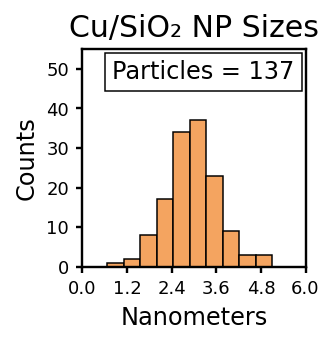

In [17]:
mpl.rcParams.update({'font.size':10 })
mpl.rcParams['pdf.fonttype'] = 42
fig, ax = plt.subplots(figsize=(2, 2),linewidth=1)

font_size = 1.5

ax.hist(sizenp,bins=10, color = 'sandybrown', edgecolor = 'black',linewidth=font_size/2)
ax.set_ylabel("Counts", fontsize = 8*font_size)
ax.set_ylim([0, 55])

counts = str(len(sizenp))
props = dict(boxstyle='square', alpha=1, facecolor = 'white', edgecolor = 'black', linewidth = font_size/2)

# place a text box in upper left in axes coords
ax.text(0.95, 0.95, 'Particles = ' + counts, transform=ax.transAxes, fontsize=8*font_size,
        verticalalignment='top', horizontalalignment = 'right',  bbox=props)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth( font_size*0.8)
    ax.spines[axis].set_position(("axes", 0))
    
for axis in ['top','right']:
    ax.spines[axis].set_visible(True)
    ax.spines[axis].set_linewidth( font_size*0.8)
    



# Set the title and labels
ax.set_title('Cu/SiO' + get_sub('2') + ' NP Sizes', fontsize = 10*font_size)
ax.set_xlabel('Nanometers', fontsize = 8*font_size)

#Adjusting range and tick frequency of x axis
xhigh = 6
xlow = 0
xpoints = 6
xdigits = 1
xlabels = [round(num, xdigits) for num in np.linspace(xlow, xhigh, xpoints)]
if xdigits <= 0:
    xlabels = [int(num) for num in xlabels]

ax.set_xticks(xlabels)
ax.set_xticklabels(xlabels)
ax.set_xlim(xlow, xhigh)

ax.tick_params(length = 2*font_size, width = font_size*0.8,labelsize = 6*font_size)   


ax.yaxis.set_tick_params(labelleft=True)
    # Save the plot as PDF format
plt.savefig('histplot.pdf', format='pdf')

# Show the plot
plt.show()

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
AxesSubplot(0.0475271,0.0962847;0.905841x0.859687)


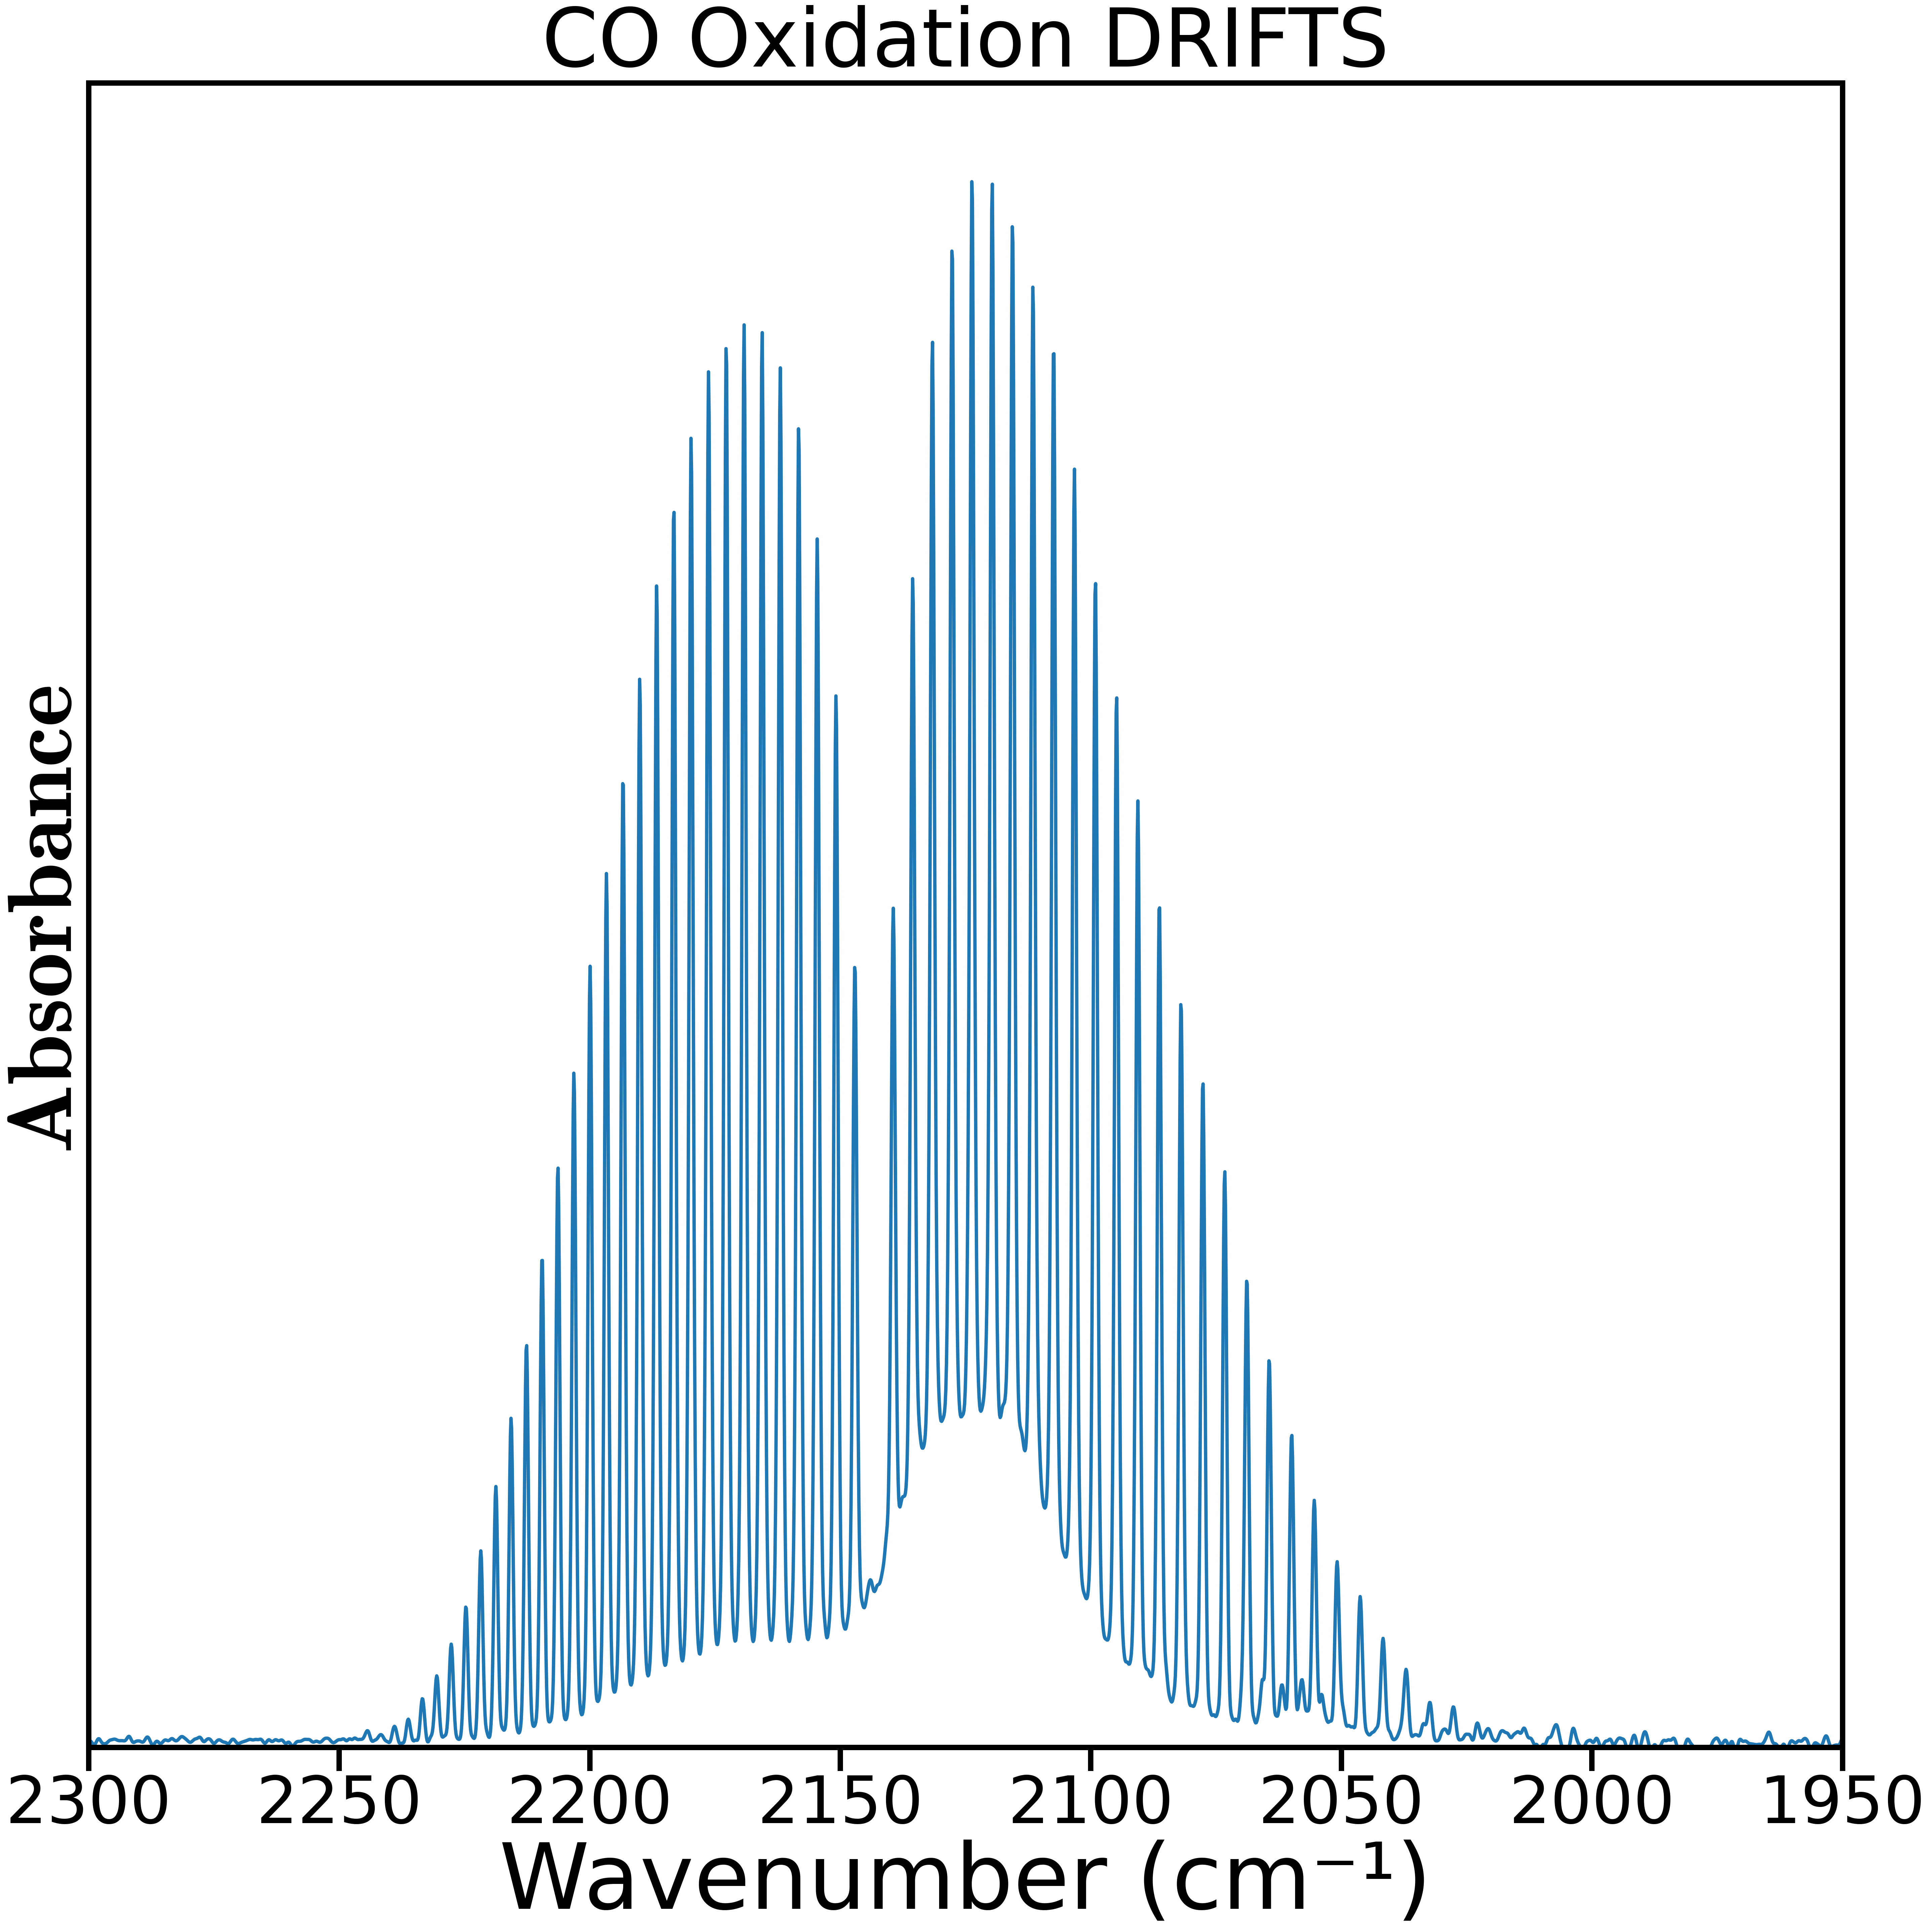

In [53]:

fig = table_for_plot.set_index('Wavenumber').plot(figsize=(40, 40), linewidth =5)

plt.gca().invert_xaxis()
mpl.rcParams['pdf.fonttype'] = 42

fm.findfont('Helvetica')
plt.rcParams['font.family'] = font_path
# Axis labels
font_size = 17
fig.set_xlabel("Wavenumber (cm" + get_super("-1") + ")", fontsize = 8*font_size,)
fig.set_ylabel("Absorbance", fontsize = 8*font_size, name = 'cmb10')


for axis in ['bottom','left']:
    fig.spines[axis].set_linewidth(8)
    fig.spines[axis].set_position(("axes", 0))
for axis in ['top','right']:
    fig.spines[axis].set_visible(True)
    fig.spines[axis].set_linewidth(8)



#print(table_for_plot.columns[1:])
# And adjust length and tkickness of tick marks
fig.tick_params(width = 8, length = 35)
fig.tick_params(axis='both', which='minor', labelsize=8)
plt.xticks(fontsize=97)
plt.yticks(fontsize=97)

#Legend Control
#fig.legend(fontsize = 80, loc = "lower right")
fig.get_legend().remove()

plt.title('CO Oxidation DRIFTS', fontsize = 120)

fig.yaxis.set_ticks_position('left')
fig.xaxis.set_ticks_position('bottom')
#Adjusting range and tick frequency of x axis
xhigh = 2300
xlow = 1950
xpoints = 8
xdigits = 0
xlabels = [round(num, xdigits) for num in np.linspace(xlow, xhigh, xpoints)]
if xdigits <= 0:
    xlabels = [int(num) for num in xlabels]

fig.set_xticks(xlabels)
fig.set_xticklabels(xlabels)
fig.set_xlim(xhigh, xlow)

yhigh = 0.5
ylow = 0
ypoints = 6
ydigits = 1
ylabels = [round(num,ydigits) for num in np.linspace(ylow, yhigh, ypoints)]
if ydigits <= 0:
    ylabels = [int(num) for num in ylabels]
print (ylabels)
fig.set_yticks([])
fig.set_yticklabels([])
fig.set_ylim(ylow, yhigh)
#fig.axes.get_yaxis().set_visible(False)

plt.tight_layout()
print(fig)
#Put the name you want for your figure here, it will be saved as "Fig_'Name'" with both a jpg for quick use and an eps for detailed edits.
fig_name = 'Drifts_221109_CuPtSiO2_COAbs'
plt.savefig(Path.cwd() / "Plot_{}.jpg".format(fig_name), bbox_inches="tight", dpi=100)

plt.savefig(Path.cwd() / "Plot_{}.pdf".format(fig_name), format='pdf')
plt.show()
